In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction/Sample_Submission.csv
/kaggle/input/loan-approval-prediction/Training Dataset.csv
/kaggle/input/loan-approval-prediction/Test Dataset.csv


# Import Essentials

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/kaggle/input/loan-approval-prediction/Training Dataset.csv')

In [4]:
# 1 st 5 rows
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#save a copy 
train_org=train.copy()


In [6]:
# total information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

ohh dataset have some null values need to clean it

In [9]:
#i want know the rows and columns
train.shape

(614, 13)

In [10]:
#hey data does you have duplicates?
train.duplicated().sum()

0

No, data does not have duplicates

In [11]:
#for numeriacal imputagtion using mean or median
#for categorical imputation using mode

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [12]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [14]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [15]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

wooo.. null values are removed

# ****Univariant analysis

In [16]:
#loan status count
loan_sta_count=train['Loan_Status'].value_counts(normalize=True)    

In [17]:
loan_sta_count

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

> wow 68% loans are approved 
> 
> around 32 percent are rejected better luck next time

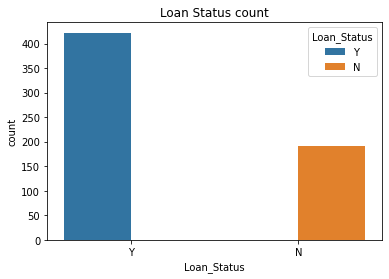

In [18]:
plt.title('Loan Status count')
sns.countplot('Loan_Status',data=train,hue='Loan_Status')
plt.show()

<AxesSubplot:title={'center':'Self_Employed'}, xlabel='Self_Employed', ylabel='count'>

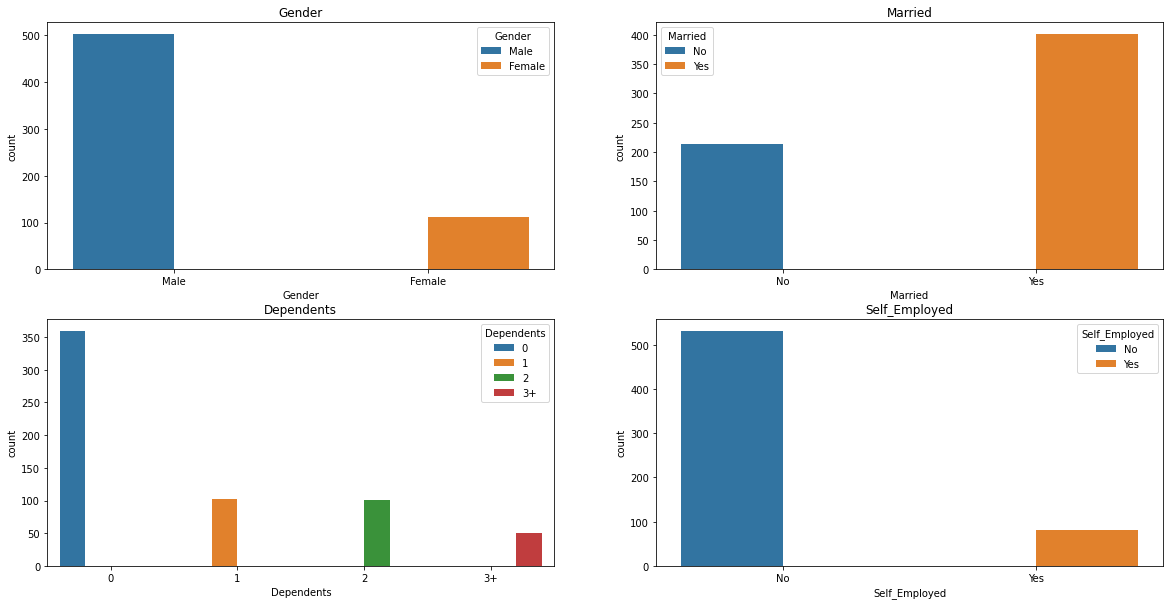

In [19]:
# catogorical variable count
plt.figure(figsize=(20,10))
plt.figure(1)
plt.subplot(221)
plt.title('Gender')
sns.countplot('Gender',data=train,hue='Gender')
plt.subplot(222)
plt.title('Married')
sns.countplot('Married',data=train,hue='Married')
plt.subplot(223)
plt.title('Dependents')
sns.countplot('Dependents',data=train,hue='Dependents')
plt.subplot(224)
plt.title('Self_Employed')
sns.countplot('Self_Employed',data=train,hue='Self_Employed')

* Most of the applicants are male
* most of the applicants are married
* most of the applicants have not dependents
* very less self employed applied for loan

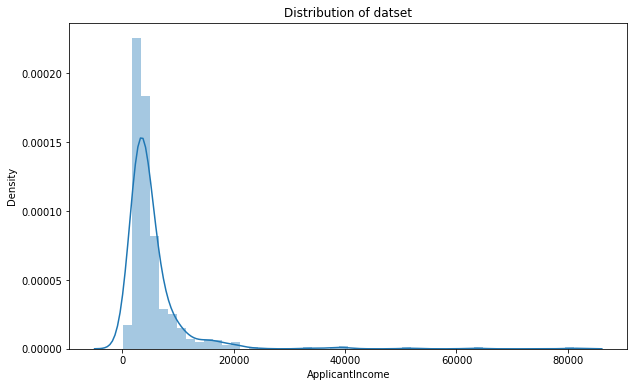

In [20]:
#distribustion of appliants income
plt.figure(figsize=(10,6))
plt.title('Distribution of datset')
sns.distplot(train['ApplicantIncome'])
plt.show()

1. data is right skewed its not normally distributed

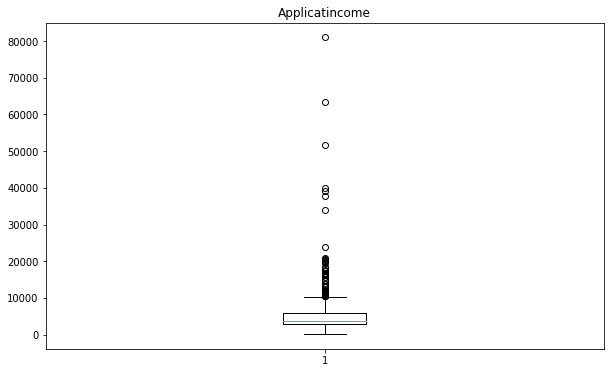

In [21]:
#checking the outliers
plt.figure(figsize=(10,6))
plt.title('Applicatincome')
plt.boxplot(train['ApplicantIncome'],vert=True)
plt.show();

As per the boxplot many outliers present in the dataset

Text(0.5, 0.98, '')

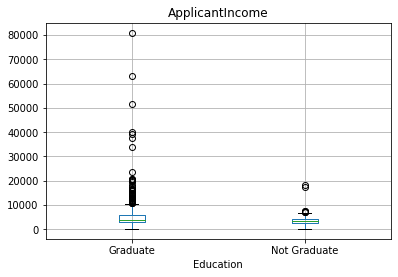

In [22]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("") 


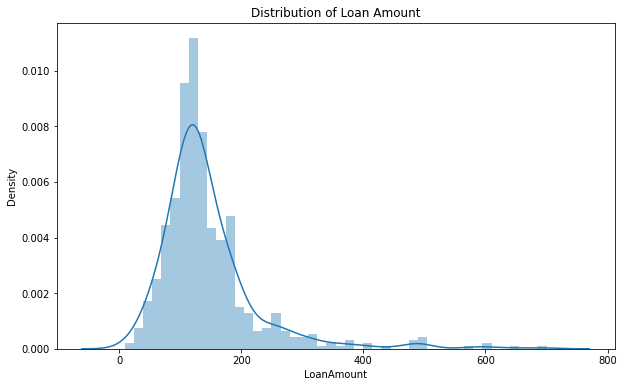

In [23]:
#distribution of loan amount
plt.figure(figsize=(10,6))
plt.title('Distribution of Loan Amount')
sns.distplot(train['LoanAmount'])
plt.show()

<AxesSubplot:>

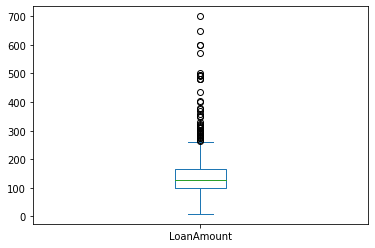

In [24]:
train['LoanAmount'].plot.box()

# Bivariant Analysis¶

In [25]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender'>

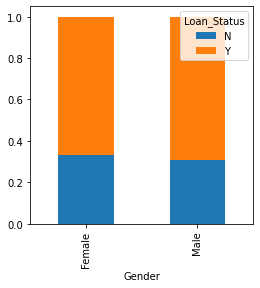

In [26]:
#gender vs loan status
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',
                                                   stacked=True,figsize=(4,4))

In [27]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


Loan_Status    N    Y
Married              
No            79  134
Yes          113  288
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


<AxesSubplot:xlabel='Self_Employed'>

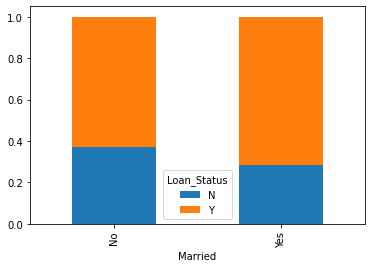

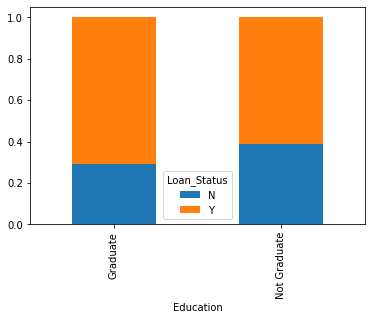

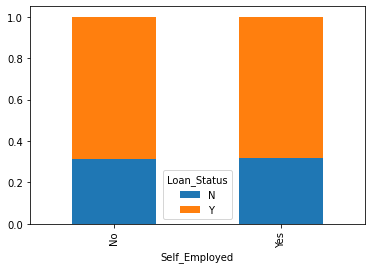

In [28]:
#married vs loan status
Married=pd.crosstab(train['Married'],train['Loan_Status'])
print(Married)
#education vs loan status
Education=pd.crosstab(train['Education'],train['Loan_Status'])
print(Education)
#eployment vs loan status
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
print(Self_Employed)
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',
                                                    stacked=True)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',
                                                         stacked=True)
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar'
                                                                 ,stacked=True)

* Married applicants are more than single
* many Graduates applied for loan
* many applicants are non self employed

<AxesSubplot:xlabel='Property_Area'>

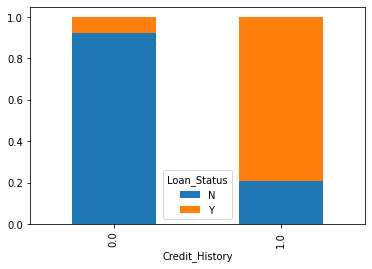

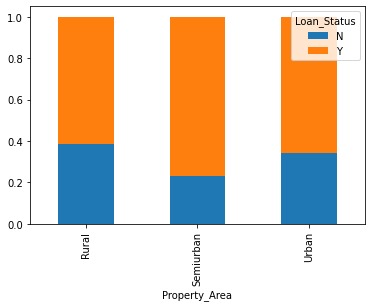

In [29]:
#credit history vs loan status
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
#property vs loan status
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar'
                                                                   ,stacked=True)
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

* it seems with crdit score 1 as more likely to get loan
* as per the plot we can see semiurban area get loans in large proportion

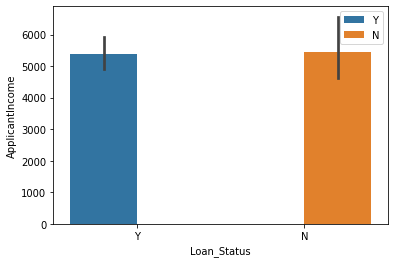

In [30]:
#applicant income vs loan status
sns.barplot(data=train,x='Loan_Status',y='ApplicantIncome',hue='Loan_Status')
plt.legend()

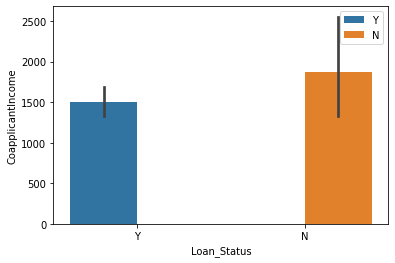

In [31]:
#coapplicantincome vs loan status
sns.barplot(data=train,x='Loan_Status',y='CoapplicantIncome',hue='Loan_Status',)
plt.legend()

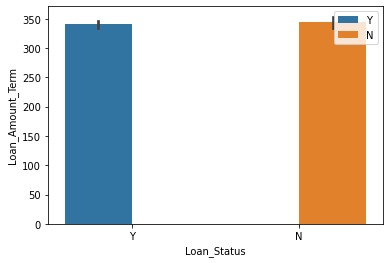

In [32]:
##loan amount term vs loan status
sns.barplot(data=train,x='Loan_Status',y='Loan_Amount_Term',hue='Loan_Status')
plt.legend()

In [33]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

## Correlation

In [34]:
matrix=train.corr()

<AxesSubplot:>

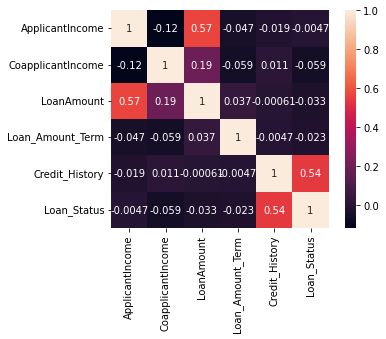

In [35]:
sns.heatmap(matrix,square=True,annot=True)

### outliers treatment

<AxesSubplot:>

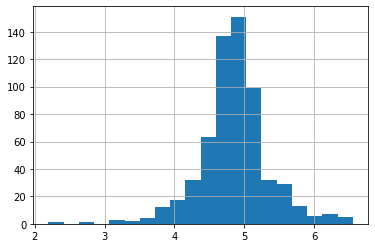

In [36]:
train['Loan_Amount_log']=np.log(train['LoanAmount'])
train['Loan_Amount_log'].hist(bins=20)

### Evaluation matrix

without evaluation we can not build model

we will check the accuracy of model by confusion matrix

true positive : actual(Y) predicted (Y)

true negrative:actual (N) predicted (N)

false positive:actual(N) predicted (Y)

false negative :actual(Y) predicted (N)

TP+TN/(TP+TN+FP+FN)

Precision: measure of correctness achived in true prediction

=TP/(TP+FP)

RECALL(sensitivity): measure of actual observation which are predicted correctly

=TP/(TP+FN)

SPECIFICITY: How many obs of false class are labeled correctly

=TN/(TN+FP)

RECALL AND SPECIFICITY plays vital role in ROC curve

Receiver Operating Characterstic summarise the model performance by evaluating the trade off between true positive and false positive 
higher the area under curve better prediction power of model

# Model Building

In [37]:
train.drop('Loan_ID',axis=1,inplace=True)

<AxesSubplot:>

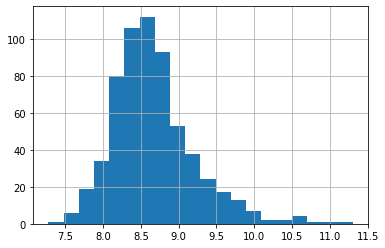

In [38]:
train['Total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['total_income_log']=np.log(train['Total_income'])
train['total_income_log'].hist(bins=20)


In [39]:
train.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

## Encoding

In [46]:
train= pd.get_dummies(train,drop_first=True)
train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_log,Total_income,total_income_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,128.0,360.0,1.0,1,4.852030,5849.0,8.674026,1,0,1,0,0,0,0,0,1
1,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,1,1,0,1,0,0,0,0,0
2,66.0,360.0,1.0,1,4.189655,3000.0,8.006368,1,1,1,0,0,0,1,0,1
3,120.0,360.0,1.0,1,4.787492,4941.0,8.505323,1,1,1,0,0,1,0,0,1
4,141.0,360.0,1.0,1,4.948760,6000.0,8.699515,1,0,1,0,0,0,0,0,1


In [47]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [48]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train=scale.fit_transform(X,y)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)


In [52]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
train_acc

0.8251748251748252

In [53]:
test_acc=accuracy_score(y_test,y_test_pred)
test_acc

0.7567567567567568

In [54]:
#accuracy after cross validation
scores=cross_val_score(model,X,y,cv=5)
score = []
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 79.32%


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=17)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [56]:
y_train_pred=Knn.predict(X_train)
y_test_pred=Knn.predict(X_test)

In [57]:
y_train_acc=accuracy_score(y_train,y_train_pred)
y_train_acc

0.7156177156177156

In [58]:
y_test_acc=accuracy_score(y_test,y_test_pred)
y_test_acc

0.6378378378378379

In [59]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
scores=cross_val_score(Knn,X,y,cv=50)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 61.44%


# DecisionTree

In [60]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(max_depth=5) #when max depth none its overfitting
d_tree.fit(X_train,y_train)
y_train_pred=d_tree.predict(X_train)
y_test_pred=d_tree.predict(X_test)


In [61]:
y_train_acc=accuracy_score(y_train,y_train_pred)
print(y_train_acc)
y_test_acc=accuracy_score(y_test,y_test_pred)
print(y_test_acc)

0.8648018648018648
0.7567567567567568


performing pretty well............

In [62]:

scores=cross_val_score(d_tree,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 79.32%


# RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier
R_Forest=RandomForestClassifier(max_depth=6)
R_Forest.fit(X_train,y_train)
y_train_pred_r=R_Forest.predict(X_train)
y_test_pred_r=R_Forest.predict(X_test)

In [64]:
train_acc=accuracy_score(y_train,y_train_pred_r)
print(train_acc)
test_acc=accuracy_score(y_test,y_test_pred_r)
print(test_acc)

0.8648018648018648
0.772972972972973


In [65]:
scores=cross_val_score(R_Forest,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 79.81%


# GradientBoostingClassifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
g_boosting=GradientBoostingClassifier(learning_rate=0.01,n_estimators=150)
g_boosting.fit(X_train,y_train)
g_boost_train_pred=g_boosting.predict(X_train)
g_boost_test_pred=g_boosting.predict(X_test)


In [93]:
train_acc=accuracy_score(y_train,g_boost_train_pred)
print(train_acc)
test_acc=accuracy_score(y_test,g_boost_test_pred)
print(test_acc)


0.8461538461538461
0.7783783783783784


In [94]:
scores=cross_val_score(g_boosting,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))


The accuration of classification is 80.46%


# SVM

In [69]:
from sklearn.svm import SVC
svc=SVC(max_iter=2)
svc.fit(X_train,y_train)
svc_train_pred=svc.predict(X_train)
svc_test_pred=svc.predict(X_test)

In [70]:
train_acc=accuracy_score(y_train,svc_train_pred)
print(train_acc)
test_acc=accuracy_score(y_test,svc_test_pred)
print(test_acc)

0.6806526806526807
0.6486486486486487


In [71]:
scores=cross_val_score(svc,X,y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 52.62%


# Result

* Random Forest is performing well
* actually our all algorithms are performing well except svm and knn
* we will apply for prediction is Gradient boosting and random forest